In [16]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as cp

In [42]:
def plot_tour(tour):
    tp = len(tour)
    for ip in range(tp-1):
        start=tour[ip]
        end=tour[ip+1]
        plt.plot([start[0], end[0]],[start[1], end[1]],'ro-')
    start=tour[0]
    end=tour[1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'bo-')
    start=tour[tp-2]
    end=tour[tp-1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'go-')
    plt.show()
def dist(c1, c2):
    return round(np.linalg.norm(c1-c2),2)

def tour_cost(tour):
    t = len(tour)
    l = 0
    for i in range(t-1):
        l += dist(tour[i], tour[i+1])
    return l


def find_min(city, city_map):
    minimum = 100
    target = 0
    for i, c in enumerate(city_map):
        if minimum > dist(city, c):
            target = i
            minimum = dist(city, c)
    return target, minimum


def one_sided_nn(index, city_map):
    city = city_map[index]
    city_map.pop(index)
    tour = [city]
    while len(city_map) > 0:
        index,_ = find_min(city, city_map)
        city = city_map[index]
        tour.append(city)
        city_map.pop(index)
    tour.append(tour[0])
    tp = len(tour)
    for ip in range(tp-1):
        start=tour[ip]
        end=tour[ip+1]
        plt.plot([start[0], end[0]],[start[1], end[1]],'ro-')
    start=tour[0]
    end=tour[1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'bo-')
    start=tour[tp-2]
    end=tour[tp-1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'go-')
    plt.show()
    return tour


def two_sided_nn(index, city_map):
    city1 = city_map[index]
    city2 = city_map[index]
    city_map.pop(index)
    tour = [city1]
    while len(city_map) > 0:
        index1, cost1 = find_min(city1, city_map)
        index2, cost2 = find_min(city2, city_map)
        if cost1 < cost2:
            tour.insert(0, city_map[index1])
            city_map.pop(index1)
        else:
            tour.append(city_map[index2])
            city_map.pop(index2)
        city1 = tour[0]
        city2 = tour[-1]
    tour.append(tour[0])
    tp = len(tour)
    for ip in range(tp-1):
        start=tour[ip]
        end=tour[ip+1]
        plt.plot([start[0], end[0]],[start[1], end[1]],'ro-')
    start=tour[0]
    end=tour[1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'bo-')
    start=tour[tp-2]
    end=tour[tp-1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'go-')
    plt.show()
    return tour

def solve_tsp(file, opt_file, initial,mode=0):
    data = np.loadtxt(file)
    data = list(data[:, 1:3])
    index = np.loadtxt(opt_file).astype(int)
    opt_tour = [data[i-1] for i in index]
    opt_cost = tour_cost(opt_tour)    
    if mode == 0:
        tour = one_sided_nn(initial-1,data)
    else:
        tour = two_sided_nn(initial-1,data)
    return tour, opt_tour
def two_opt(tour,i,j):
    new_tour = cp(tour)
    new_tour[i:j+1] = list(reversed(new_tour[i:j+1]))
    return  new_tour
def improve(tour):
    cost = tour_cost(tour)
    br = 1
    while(1):
        for node1 in range(1,len(tour)-2):
            for node2 in range(node1+1,len(tour)-1):
                if ((node1!=1) | (node2!=len(tour)-2)): 
                    new_tour = two_opt(tour,node1,node2)
                    new_cost = tour_cost(new_tour)
                    if new_cost < cost:
                        cost = new_cost
                        tour = cp(new_tour)
                        br = 0
                        
        if br == 1:
            break
        else:
            br = 1 
                    
    plot_tour(tour)
    return cost

# ONE SIDED

******************************************************************************************************
Data/eil51.dat 10


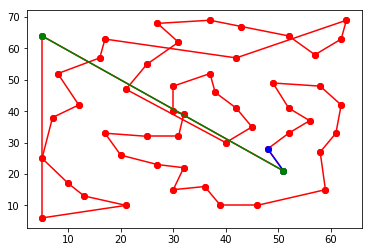

opt_cost: 429.97  cost: 558.8399999999999 =====>>> rate: 0.2997185850175591


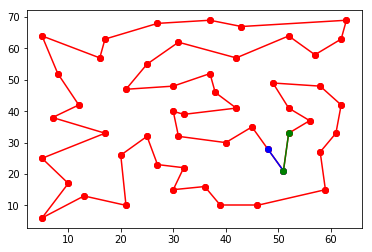

opt_cost: 429.97  improve_cost: 462.77000000000015 =====>>> rate: 0.07628439193432128
Improvement: 0.2234341930832378
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil51.dat 20


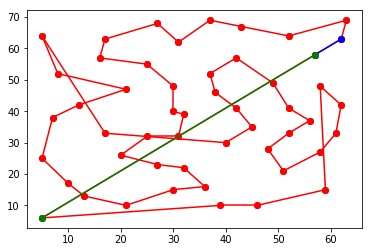

opt_cost: 429.97  cost: 567.29 =====>>> rate: 0.319371118915273


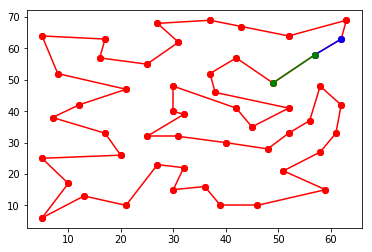

opt_cost: 429.97  improve_cost: 462.3500000000001 =====>>> rate: 0.07530757959857676
Improvement: 0.24406353931669622
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil51.dat 30


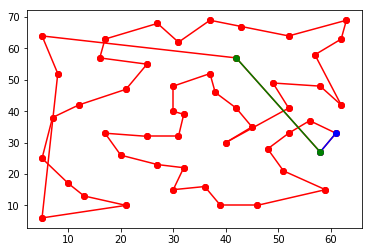

opt_cost: 429.97  cost: 520.0000000000001 =====>>> rate: 0.20938670139777213


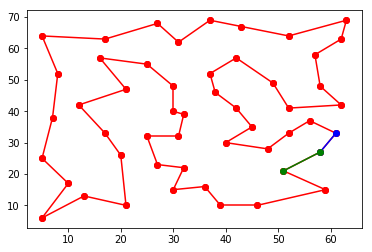

opt_cost: 429.97  improve_cost: 445.26000000000016 =====>>> rate: 0.03556062050840787
Improvement: 0.17382608088936424
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 10


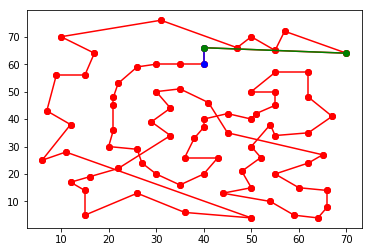

opt_cost: 545.34  cost: 640.48 =====>>> rate: 0.17445996992701798


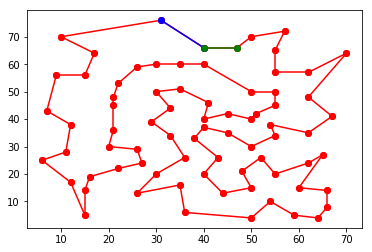

opt_cost: 545.34  improve_cost: 571.3799999999999 =====>>> rate: 0.047750027505775935
Improvement: 0.12670994242124206
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 20


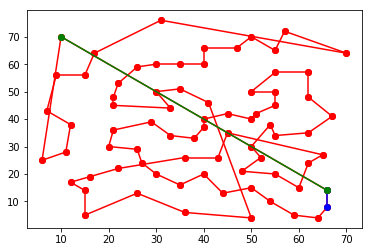

opt_cost: 545.34  cost: 735.9300000000001 =====>>> rate: 0.34948839256243813


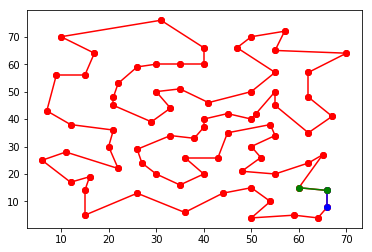

opt_cost: 545.34  improve_cost: 579.0300000000001 =====>>> rate: 0.06177797337440872
Improvement: 0.2877104191880294
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 30


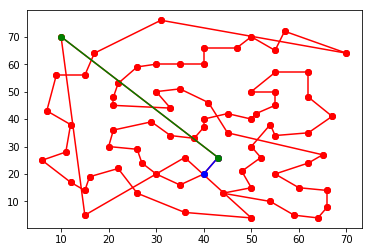

opt_cost: 545.34  cost: 730.23 =====>>> rate: 0.3390361976014963


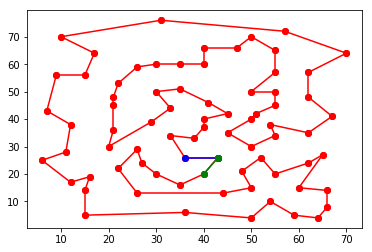

opt_cost: 545.34  improve_cost: 589.78 =====>>> rate: 0.0814904463270619
Improvement: 0.25754575127443435
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 10


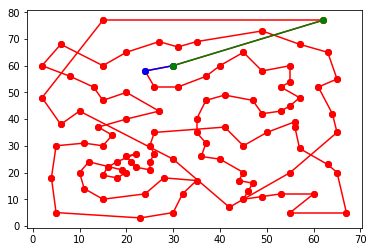

opt_cost: 642.2300000000005  cost: 795.98 =====>>> rate: 0.23940021487628954


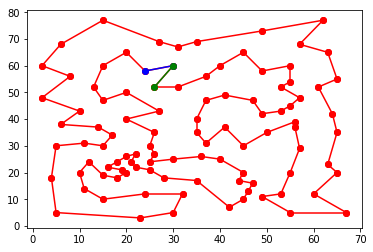

opt_cost: 642.2300000000005  improve_cost: 669.7700000000004 =====>>> rate: 0.04288183361101154
Improvement: 0.19651838126527799
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 20


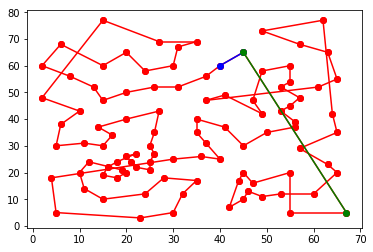

opt_cost: 642.2300000000005  cost: 800.6700000000003 =====>>> rate: 0.246702894601622


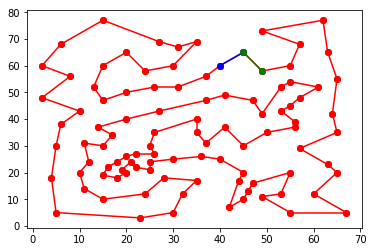

opt_cost: 642.2300000000005  improve_cost: 680.1300000000002 =====>>> rate: 0.059013126138610345
Improvement: 0.18768976846301166
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 30


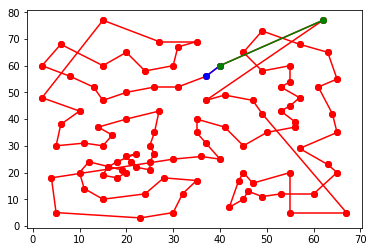

opt_cost: 642.2300000000005  cost: 776.4600000000003 =====>>> rate: 0.20900611930305293


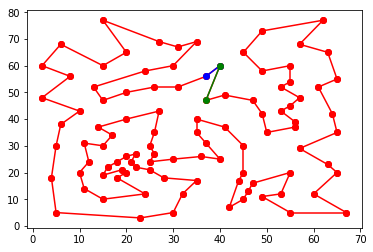

opt_cost: 642.2300000000005  improve_cost: 681.1400000000008 =====>>> rate: 0.060585771452595305
Improvement: 0.14842034785045763
-------------------------------------------------------------------------------


In [43]:
file_list = ['Data/eil51.dat','Data/eil76.dat','Data/eil101.dat']
opt_file_list = ['Data/eil51opt.dat','Data/eil76opt.dat','Data/eil101opt.dat']
initial_list = [10,20,30]
for i in range(3):
    file = file_list[i]
    opt_file = opt_file_list[i]
    for initial in initial_list:
        print("******************************************************************************************************")
        print(file,initial)
        tour, opt_tour = solve_tsp(file,opt_file, initial,mode=0)
        cost = tour_cost(tour)
        opt_cost = tour_cost(opt_tour)
        rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' cost:',cost,'=====>>>','rate:',rate)
        cost = improve(tour)
        new_rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' improve_cost:',cost,'=====>>>','rate:',new_rate)
        print("Improvement:",rate-new_rate)
        print("-------------------------------------------------------------------------------")

# TWO SIDED

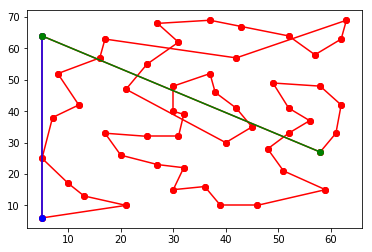

Data/eil51.dat 10
opt_cost: 429.97  cost: 558.47 =====>>> rate: 0.2988580598646417


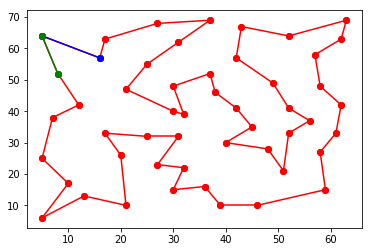

opt_cost: 429.97  improve_cost: 450.18 =====>>> rate: 0.04700327929855566
Improvement: 0.251854780566086
-------------------------------------------------------------------------------


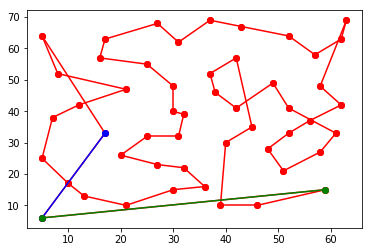

Data/eil51.dat 20
opt_cost: 429.97  cost: 545.56 =====>>> rate: 0.2688327092587853


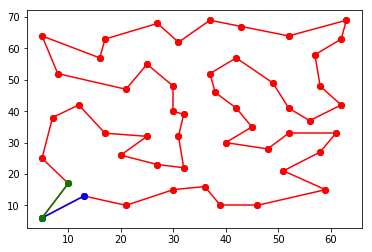

opt_cost: 429.97  improve_cost: 434.9200000000001 =====>>> rate: 0.01151243109984428
Improvement: 0.257320278158941
-------------------------------------------------------------------------------


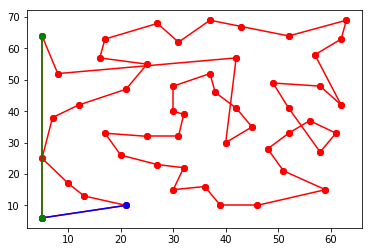

Data/eil51.dat 30
opt_cost: 429.97  cost: 520.6299999999999 =====>>> rate: 0.21085191990138813


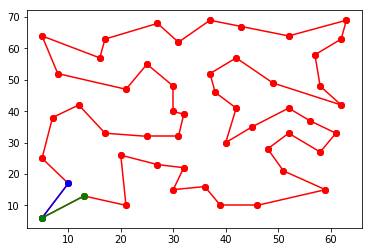

opt_cost: 429.97  improve_cost: 444.21 =====>>> rate: 0.033118589669046565
Improvement: 0.17773333023234156
-------------------------------------------------------------------------------


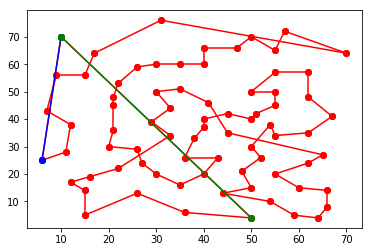

Data/eil76.dat 10
opt_cost: 545.34  cost: 699.02 =====>>> rate: 0.28180584589430435


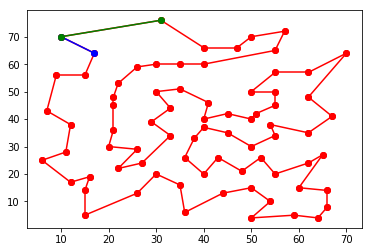

opt_cost: 545.34  improve_cost: 570.6 =====>>> rate: 0.04631972714269995
Improvement: 0.2354861187516044
-------------------------------------------------------------------------------


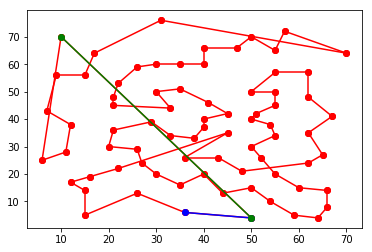

Data/eil76.dat 20
opt_cost: 545.34  cost: 699.95 =====>>> rate: 0.2835112040195108


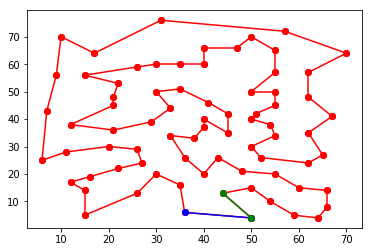

opt_cost: 545.34  improve_cost: 584.7800000000004 =====>>> rate: 0.07232185425606116
Improvement: 0.21118934976344964
-------------------------------------------------------------------------------


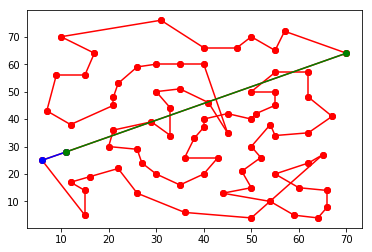

Data/eil76.dat 30
opt_cost: 545.34  cost: 662.8599999999999 =====>>> rate: 0.21549858803682082


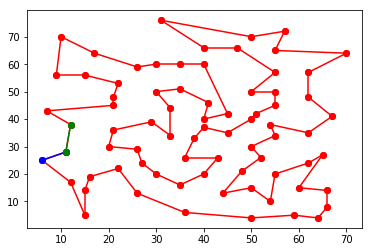

opt_cost: 545.34  improve_cost: 595.0899999999999 =====>>> rate: 0.09122749110646548
Improvement: 0.12427109693035533
-------------------------------------------------------------------------------


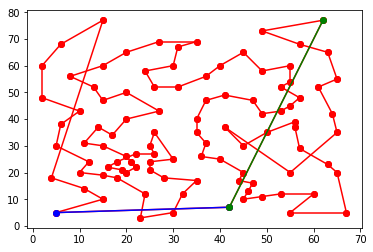

Data/eil101.dat 10
opt_cost: 642.2300000000005  cost: 816.6 =====>>> rate: 0.2715070924746577


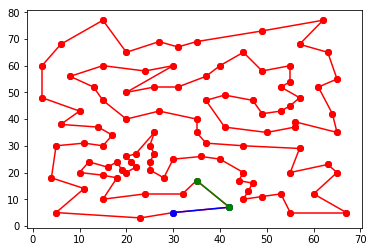

opt_cost: 642.2300000000005  improve_cost: 692.0200000000002 =====>>> rate: 0.0775267427557101
Improvement: 0.19398034971894762
-------------------------------------------------------------------------------


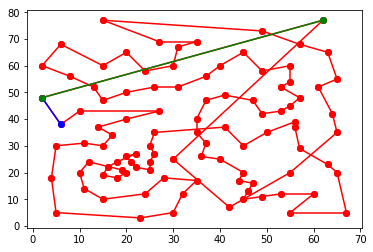

Data/eil101.dat 20
opt_cost: 642.2300000000005  cost: 833.5400000000003 =====>>> rate: 0.29788393566167837


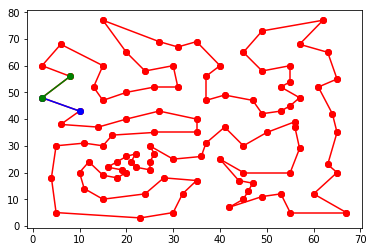

opt_cost: 642.2300000000005  improve_cost: 683.2800000000002 =====>>> rate: 0.0639179110287587
Improvement: 0.23396602463291966
-------------------------------------------------------------------------------


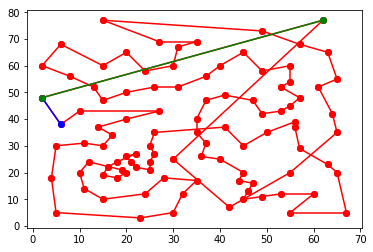

Data/eil101.dat 30
opt_cost: 642.2300000000005  cost: 833.5400000000003 =====>>> rate: 0.29788393566167837


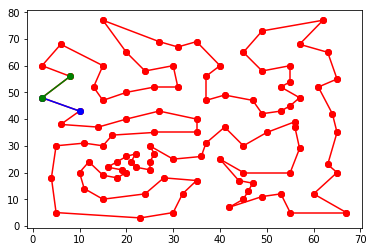

opt_cost: 642.2300000000005  improve_cost: 683.2800000000002 =====>>> rate: 0.0639179110287587
Improvement: 0.23396602463291966
-------------------------------------------------------------------------------


In [44]:
file_list = ['Data/eil51.dat','Data/eil76.dat','Data/eil101.dat']
opt_file_list = ['Data/eil51opt.dat','Data/eil76opt.dat','Data/eil101opt.dat']
initial_list = [10,20,30]
for i in range(3):
    file = file_list[i]
    opt_file = opt_file_list[i]
    for initial in initial_list:
        tour, opt_tour = solve_tsp(file,opt_file, initial,mode=1)
        cost = tour_cost(tour)
        opt_cost = tour_cost(opt_tour)
        rate = (cost-opt_cost)/opt_cost
        print(file,initial)
        print('opt_cost:',opt_cost,' cost:',cost,'=====>>>','rate:',rate)
        cost = improve(tour)
        new_rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' improve_cost:',cost,'=====>>>','rate:',new_rate)
        print("Improvement:",rate-new_rate)
        print("-------------------------------------------------------------------------------")